In [253]:
import pandas as pd
import os
from PIL import Image
# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
from numpy import asarray
import numpy as np
import scipy
# set up jupyter-notebook
%load_ext autoreload
%autoreload 2
pd.options.display.max_columns = None

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [254]:
path = os.getcwd()
path = '{}/ds/00001'.format(path)
files = os.listdir(path)
images = [f for f in files if f[-3:] == 'bmp']
print(images)

['img_00029.bmp', 'img_00001.bmp', 'img_00015.bmp', 'img_00014.bmp', 'img_00028.bmp', 'img_00016.bmp', 'img_00002.bmp', 'img_00003.bmp', 'img_00017.bmp', 'img_00013.bmp', 'img_00007.bmp', 'img_00006.bmp', 'img_00012.bmp', 'img_00004.bmp', 'img_00010.bmp', 'img_00011.bmp', 'img_00005.bmp', 'img_00008.bmp', 'img_00020.bmp', 'img_00021.bmp', 'img_00009.bmp', 'img_00023.bmp', 'img_00022.bmp', 'img_00026.bmp', 'img_00027.bmp', 'img_00025.bmp', 'img_00031.bmp', 'img_00019.bmp', 'img_00018.bmp', 'img_00030.bmp', 'img_00024.bmp']


BMP
L
(360, 240)
Object <PIL.BmpImagePlugin.BmpImageFile image mode=L size=360x240 at 0x1287035D0>
--------------------------------------------------------
uint8
(240, 360)
[[ 0  0 14 ...  0  9  3]
 [ 3 30 83 ...  8  6  0]
 [ 0 29 97 ... 11  1  2]
 ...
 [ 0 33 73 ...  7  9  2]
 [ 2 19 66 ...  6  8  3]
 [ 1 31 65 ...  8 11  4]]


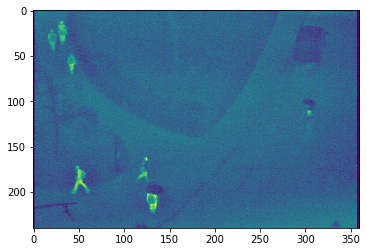

--------------------------------------------------------


In [255]:
# load the image
img = Image.open(path + '/' + images[0])
# summarize some details about the image
print(img.format)
print(img.mode)
print(img.size)
print('Object', img)
# show the image
# img.show()
print('--------------------------------------------------------')
# load image as pixel array
data = image.imread(path + '/' + images[0])
# summarize shape of the pixel array
print(data.dtype)
print(data.shape)
print(data)
# display the array of pixels as an image
pyplot.imshow(data)
pyplot.show()
print('--------------------------------------------------------')

# # convert image to numpy array
# imageArray = asarray(img)
# # summarize shape
# print(imageArray.shape)
# # create Pillow image
# image2 = Image.fromarray(imageArray)
# # summarize image details
# print(image2.format)
# print(image2.mode)
# print(image2.size)
# print(image2)



![image-20191213182234676](https://tva1.sinaimg.cn/large/006tNbRwgy1g9vw7mfbjwj30gw04kjrw.jpg)

![image-20191213183517749](https://tva1.sinaimg.cn/large/006tNbRwgy1g9vwkv9mspj30hn06ymym.jpg)

In [256]:
from scipy.special import gamma
import math
def asymmetric_generalized_gaussian(x, mean, sigma_l, sigma_r, beta):
    def A(beta):
        return math.pow(gamma(3/beta)/gamma(1/beta), beta/2)
    
    coefficient = (beta * math.pow((gamma(3/beta)/gamma(1/beta)), 0.5)) / ((sigma_l + sigma_r) * gamma(1/beta))
    def f(new_x, sigma, beta):
        return coefficient * np.exp(-A(beta) * ((new_x/sigma) ** beta))
    
    
    return np.where(x - mean < 0 , f(mean - x, sigma_l, beta), f(x - mean, sigma_r, beta))
    
# x = np.array([[1,10],[4,6], [7,8]])
# m = x.mean(axis=1, keepdims=True)
# print(x)
# print(m)
# print(asymmetric_generalized_gaussian(x,m,1,2,1))

DEBUG:TestKmeanPP:[[ 4.9666907  -5.05399386]
 [-5.03428278 -5.06099388]
 [-0.03398811  4.94373292]]
DEBUG:TestKmeanPP:->begin to draw gaussian models


(300,) (300, 2) (300,)
(300,) (300, 2) (300,)


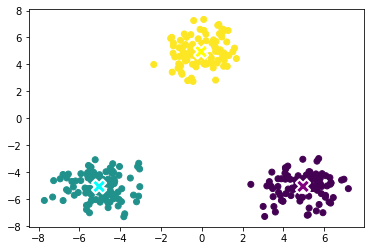

.
----------------------------------------------------------------------
Ran 1 test in 0.265s

OK


(900,) (900, 2) (900,)
(900,) (900, 2) (900,)
[[-1.57772908 -0.38899908]
 [-2.17251949  5.46165051]
 [ 4.50160762  2.95849499]]


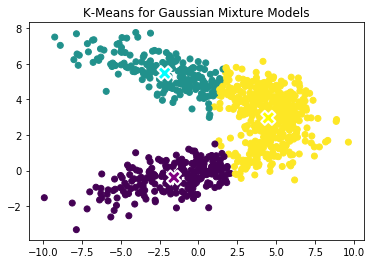

In [257]:
#import k-means
%run ../test_algorithms/test_kmean.py
n_samples = 300

# generate random sample, two cluster
np.random.seed(0)
# generate spherical data 
shifted_gaussian = np.random.randn(n_samples, 2) + np.array([5, 3])
# generate zero centered stretched Gaussian data
C = np.array([[0., -0.7], [3.5, .7]])
stretched_gaussian = np.dot(np.random.randn(n_samples, 2), C)
# the other one
stretched_shifted_gaussian = np.dot(np.random.randn(n_samples, 2), np.array([[0., -0.7], [-3.5, .7]])) + np.array([0, 5])

# concatenate the two datasets into the final training set
X = np.vstack([shifted_gaussian, stretched_gaussian, stretched_shifted_gaussian])

kpp = KMeansPP(3)
kpp.fit(X)
cluster = kpp.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=cluster)
plt.scatter(kpp.centers[:, 0], kpp.centers[:, 1], s=200, marker='X', lw=2, c=['purple', 'cyan', 'yellow'],
            edgecolor="white")
plt.title('K-Means for Gaussian Mixture Models')
plt.show()

In [258]:
class AGGM_EM(object):
    
    def __init__(self, centers, X):
        self.X = X
        self.cluster_num, self.dim = centers.shape
        self.mean = centers
        cov = [np.std(X[:,i]) for i in range(self.dim)]
#         print(np.std(X[:,0]), np.std(X[:,1]), [np.std(X[:,i]) for i in range(self.dim)])
        self.sigma_l = self.sigma_r = np.array([cov for _ in range(self.cluster_num)])
        self.coef = np.ones(self.cluster_num) / 3
        self.beta = np.array([[2 for _ in range(self.dim)] for _ in range(self.cluster_num)])
#         self.beta = np.ones(self.cluster_num) * 2
        self.params = np.hstack(
            (self.mean.ravel(),
            self.sigma_l.ravel(),
            self.sigma_r.ravel(),
            self.beta.ravel(),
            self.coef.ravel())
        )
        self.resp = np.zeros((len(X), self.cluster_num))
#         print(self.X)
#         print(self.beta.shape, self.beta)
#         print(self.mean.shape)
#         print(self.sigma_l.shape, self.sigma_l)
#         print(self.sigma_l.ravel())
#         print(self.resp)
        
    def A(self, beta):
        return (gamma(3/beta)/gamma(1/beta)) ** (beta/2)
    
    def _asymmetric_generalized_gaussian(self, x, mean, sigma_l, sigma_r, beta):
        coefficient = (beta * ((gamma(3/beta)/gamma(1/beta)) ** 0.5)) / ((sigma_l + sigma_r) * gamma(1/beta))
        def f(new_x, sigma, beta):
            likelihood = coefficient * np.exp(-self.A(beta) * ((new_x/sigma) ** beta))
            #print('----', new_x, likelihood)
            return likelihood

        return np.where(x - mean < 0 , f(mean - x, sigma_l, beta), f(x - mean, sigma_r, beta))        
          
    
    def _e_step(self):
#         print(self.X.shape)
        for i in range(self.cluster_num):
            likelihoods = []
            for j in range(self.X.shape[0]):
                likelihood = self._asymmetric_generalized_gaussian(self.X[j], self.mean[i], self.sigma_l[i], self.sigma_r[i], self.beta[i])
                likelihoods.append(likelihood[0] * likelihood[1])
#                 print(likelihood[0] * likelihood[1], np.dot(likelihood , likelihood.T))
#                 print(i, j, likelihood)            
            
#             print(likelihoods)
#             print(np.array(likelihoods))
            self.resp[:, i] = self.coef[i] * np.array(likelihoods)
        # normalization for over all possible cluster assignments
        # resp = resp / resp.sum(axis = 1)[:,np.newaxis]
        self.resp = self.resp / self.resp.sum(axis = 1, keepdims=True)
        print(self.resp, self.resp.shape)
    
    def _m_step(self):
        # print(self.X, self.X[0:3])
#         print('---', self.resp, self.beta.shape, self.mean.shape, self.resp[:,0])
        def f(Z, new_x, sigma, beta, debug=1):
            ret = debug * Z * new_x ** (beta - 1) / sigma ** (beta) 
#             print('in f', ret)
            return ret
        def second_f(Z, new_x, sigma, beta):
            ret = Z * new_x ** (beta - 2) / sigma ** (beta) 
            return ret
        def sigma_f(A, Z, new_x, beta, sigma):
            ret = Z * A(beta) * beta / sigma * ((new_x / sigma) ** beta)
            return ret
        
        def sigma_second_f(A, Z, new_x, beta, sigma):
            ret = Z * A(beta) * beta * (beta + 1)/ (sigma ** 2) * ((new_x / sigma) ** beta)
            return ret
        
        def beta_f(param):
            return scipy.special.digamma(param)
        
        def beta_sec_f(param):
            return scipy.special.polygamma(1,param)
        
        def beta_f2(A, Z, new_x, beta, sigma):
            ret = Z * A(beta) * ((new_x / beta) ** beta)
            ret = ret * ((3 * beta_f(3/beta) - beta_f(1/beta)) / (2 * beta) - np.log(new_x/sigma))
            return ret
            
            
        def beta_sec_f2(Z, new_x, beta, sigma):
            ret = Z*((new_x/sigma)** beta) * ( (9 * beta_sec_f(3/beta) - beta_sec_f(1/beta))/(2 * (beta ** 3)) 
             + (3 * beta_f(3/beta) - beta_f(1/beta)) / (2 * (beta ** 2))
             + (3 * beta_f(3/beta) - beta_f(1/beta)) / (2 * beta)
             - (np.log(new_x/sigma) ** 2)
            )
            return ret
            
        #################### set the parameter of mean #########################
        for i in range(self.cluster_num):
            Z = self.resp[:,i]
            Z = Z[:, np.newaxis]
            
            ret = np.where(self.X - self.mean[i] >= 0, f(Z, self.X - self.mean[i], self.sigma_l[i], self.beta[i]), f(Z, self.mean[i] - self.X, self.sigma_r[i], self.beta[i], -1))
            first_derivative = self.A(self.beta[i])*self.beta[i] * np.sum(ret, axis=0)
            
            ret2 = np.where(self.X - self.mean[i] >= 0, second_f(Z, self.X - self.mean[i], self.sigma_r[i], self.beta[i]), second_f(Z, self.mean[i] - self.X, self.sigma_l[i], self.beta[i]))
            second_derivative = self.A(self.beta[i])*self.beta[i]*(self.beta[i] - 1) * np.sum(ret2, axis=0)
            print('--', first_derivative, second_derivative, first_derivative / second_derivative)
            
        ################### set the parameter of left sigma ###################
            temp_Z = np.sum(Z/(self.sigma_l[i] + self.sigma_r[i]), axis=0)
            temp_second_Z = np.sum(Z/((self.sigma_l[i] + self.sigma_r[i]) ** 2), axis=0)
            
            sigma_l_first = np.sum(np.where(self.X - self.mean[i] < 0, 
                     sigma_f(self.A, Z, self.mean[i] - self.X, self.beta[i], self.sigma_l[i]), 0), axis=0)
            sigma_l_first = sigma_l_first - temp_Z
            print('sigma_l_first', sigma_l_first, temp_Z)
            
            sigma_l_second = np.where(self.X - self.mean[i] < 0, 
                                     sigma_second_f(self.A, Z, self.mean[i] - self.X, self.beta[i], self.sigma_l[i])
                                     , 0)
            sigma_l_second = np.sum(sigma_l_second, axis=0) - temp_second_Z
            print('sigma_l_second', sigma_l_second, temp_second_Z)

        ################## set the parameter of right sigma ###################
            sigma_r_first = np.sum(np.where(self.X - self.mean[i] >= 0, 
                     sigma_f(self.A, Z, self.X - self.mean[i], self.beta[i], self.sigma_r[i]), 0), axis=0)
            sigma_r_first = sigma_r_first - temp_Z
            print('sigma_r_first', sigma_r_first, temp_Z)
            
            sigma_r_second = np.where(self.X - self.mean[i] >= 0, 
                                     sigma_second_f(self.A, Z, self.X - self.mean[i], self.beta[i], self.sigma_r[i])
                                     , 0)
            sigma_r_second = np.sum(sigma_r_second, axis=0) - temp_second_Z
            print('sigma_r_second', sigma_r_second, temp_second_Z)

        ################## set the parameter of beta #######################
            beta_first = 1/self.beta[i] - 3/2*((beta_f(3/self.beta[i]) - beta_f(1/self.beta[i])) / self.beta[i] ** 2)

            beta_first = np.sum(Z * beta_first, axis=0)
    
            tmp = np.sum(np.where(self.X - self.mean[i] >= 0, 
                beta_f2(self.A, Z, self.X - self.mean[i], self.beta[i], self.sigma_r[i])
              , beta_f2(self.A, Z, self.mean[i] - self.X, self.beta[i], self.sigma_l[i])), axis=0)
            
#             print('tmp', tmp)
            beta_first = beta_first + tmp 
            print("beta_f", beta_first)
        
            beta_second = np.sum(Z*(1/(self.beta[i] ** 2) + 
                             3 * beta_sec_f(1/self.beta[i]) / 2* (self.beta[i] ** 4) + 
                             3 * (beta_f(1/self.beta[i]) - beta_f(3/self.beta[i])) / (self.beta[i] ** 3)
                             - 9 * beta_sec_f(3/self.beta[i]) / (2* (self.beta[i] ** 4))
                            ), axis=0)
            
            tmp2 = self.A(self.beta[i]) * np.sum(np.where(self.X - self.mean[i] >= 0, 
                     beta_sec_f2(Z, self.X - self.mean[i], self.beta[i], self.sigma_r[i]),
                     beta_sec_f2(Z, self.mean[i] - self.X, self.beta[i], self.sigma_l[i]),
                    ), axis=0)
            beta_second = beta_second + tmp2
            print("beta_sec", beta_second, beta_first / beta_second)
            
            
            self.mean[i] = self.mean[i] + first_derivative / second_derivative
            self.sigma_l[i] = self.sigma_l[i] + sigma_l_first / sigma_l_second
            self.sigma_r[i] = self.sigma_r[i] + sigma_r_first / sigma_r_second
            self.beta[i] = self.beta[i] + beta_first / beta_second
            
        Nk = np.sum(self.resp, axis=0)
        # Nk/N
        self.coef = Nk / len(X)
        print(Nk, self.coef)
        
    
    def em(self):
        while True:
            self._e_step()
            self._m_step()
            new_params = np.hstack(
                (self.mean.ravel(),
                self.sigma_l.ravel(),
                self.sigma_r.ravel(),
                self.beta.ravel(),
                self.coef.ravel())
            )
            if np.allclose(self.params, new_params):
                break
            else:
                self.params = new_params
            print('-[params]>',self.params, '--')
        
# init with the standard deviation
aggm = AGGM_EM(kpp.centers, X)
aggm.em()
# aggm._e_step()
# aggm._m_step()
# aggm._e_step()

[[0.02498351 0.04355669 0.93145981]
 [0.01044813 0.1354879  0.85406397]
 [0.05507004 0.02183752 0.92309243]
 ...
 [0.03002331 0.52073004 0.44924665]
 [0.04970972 0.74369365 0.20659663]
 [0.03423214 0.80615612 0.15961174]] (900, 3)
-- [16.820583  26.3032764] [17.78597371 45.24692188] [0.9457218  0.58132742]
sigma_l_first [-18.48655292 -46.84222717] [33.13907626 52.85621926]
sigma_l_second [ 7.34967401 -3.58942359] [ 4.44649343 11.31173047]
sigma_r_first [ 5.91010805 -2.31051139] [33.13907626 52.85621926]
sigma_r_second [26.99046154 53.5918247 ] [ 4.44649343 11.31173047]
beta_f [ 34.36603487 -47.71486183]
beta_sec [29135.68856318 29094.21186586] [ 0.00117952 -0.00164001]
-- [ 20.99155256 -22.51083429] [16.41974358 41.77127815] [ 1.27843364 -0.538907  ]
sigma_l_first [-17.3268329   -4.40587552] [30.59349708 48.79606712]
sigma_l_second [ 6.57553111 46.55670369] [ 4.1049359  10.44281954]
sigma_r_first [ 15.84268862 -42.00125049] [30.59349708 48.79606712]
sigma_r_second [33.27900194 -1.71788

/Users/faith/anaconda3/envs/py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:85: RuntimeWarning: invalid value encountered in log
/Users/faith/anaconda3/envs/py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in log
/Users/faith/anaconda3/envs/py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:107: RuntimeWarning: divide by zero encountered in true_divide



sigma_l_first [14.19378037  2.0730768 ] [-22.57840696  -2.10447502]
sigma_l_second [-9.69483518  0.06448684] [-7.89394321 -0.0685796 ]
sigma_r_first [-14.75113716   0.99085428] [-22.57840696  -2.10447502]
sigma_r_second [-70.4137873   -0.07658091] [-7.89394321 -0.0685796 ]
beta_f [  15.16326176 -726.58216089]
beta_sec [-7616.04412924   141.76944995] [-1.99096296e-03 -5.12509685e+00]
-- [-12.18779365   1.08969801] [-15.86770956  -0.        ] [0.76808777       -inf]
sigma_l_first [7.98747789 0.62198758] [-12.435824    -0.73029678]
sigma_l_second [-4.54699144  0.00556479] [-3.96692739 -0.01368056]
sigma_r_first [-10.00230056   0.72178528] [-12.435824    -0.73029678]
sigma_r_second [-3.89785554e+01  1.30427808e-02] [-3.96692739 -0.01368056]
beta_f [   8.92124442 -267.95859318]
beta_sec [-4598.67995087   113.12740244] [-1.93995767e-03 -2.36864444e+00]
-- [ -0.68701875 -35.69583862] [ 0.25521942 -0.        ] [-2.69187495         inf]
sigma_l_first [  -7.92335342 1000.60651341] [   8.0020154

/Users/faith/anaconda3/envs/py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:163: RuntimeWarning: divide by zero encountered in true_divide
/Users/faith/anaconda3/envs/py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide
/Users/faith/anaconda3/envs/py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide
/Users/faith/anaconda3/envs/py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in power
/Users/faith/anaconda3/envs/py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in multiply


[[nan nan nan]
 [nan nan nan]
 [nan nan nan]
 ...
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]] (900, 3)
-- [nan nan] [nan nan] [nan nan]
sigma_l_first [nan nan] [nan nan]
sigma_l_second [nan nan] [nan nan]
sigma_r_first [nan nan] [nan nan]
sigma_r_second [nan nan] [nan nan]
beta_f [nan nan]
beta_sec [nan nan] [nan nan]
-- [nan nan] [nan nan] [nan nan]
sigma_l_first [nan nan] [nan nan]
sigma_l_second [nan nan] [nan nan]
sigma_r_first [nan nan] [nan nan]
sigma_r_second [nan nan] [nan nan]
beta_f [nan nan]
beta_sec [nan nan] [nan nan]
-- [nan nan] [nan nan] [nan nan]
sigma_l_first [nan nan] [nan nan]
sigma_l_second [nan nan] [nan nan]
sigma_r_first [nan nan] [nan nan]
sigma_r_second [nan nan] [nan nan]
beta_f [nan nan]
beta_sec [nan nan] [nan nan]
[nan nan nan] [nan nan nan]
-[params]> [            nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
          

/Users/faith/anaconda3/envs/py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in subtract
/Users/faith/anaconda3/envs/py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:137: RuntimeWarning: divide by zero encountered in true_divide
/Users/faith/anaconda3/envs/py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:85: RuntimeWarning: invalid value encountered in true_divide
/Users/faith/anaconda3/envs/py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:152: RuntimeWarning: divide by zero encountered in true_divide
/Users/faith/anaconda3/envs/py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:152: RuntimeWarning: invalid value encountered in subtract
/Users/faith/anaconda3/envs/py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in true_divide
/Users/faith/anaconda3/envs/py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered i


beta_f [nan nan]
beta_sec [nan nan] [nan nan]
-- [nan nan] [nan nan] [nan nan]
sigma_l_first [nan nan] [nan nan]
sigma_l_second [nan nan] [nan nan]
sigma_r_first [nan nan] [nan nan]
sigma_r_second [nan nan] [nan nan]
beta_f [nan nan]
beta_sec [nan nan] [nan nan]
-- [nan nan] [nan nan] [nan nan]
sigma_l_first [nan nan] [nan nan]
sigma_l_second [nan nan] [nan nan]
sigma_r_first [nan nan] [nan nan]
sigma_r_second [nan nan] [nan nan]
beta_f [nan nan]
beta_sec [nan nan] [nan nan]
[nan nan nan] [nan nan nan]
-[params]> [            nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan -9.22337204e+18 -9.22337204e+18
 -9.22337204e+18 -9.22337204e+18 -9.22337204e+18 -9.22337204e+18
             nan             nan             nan] --
[[nan nan nan]
 [nan nan nan]
 [nan n

[[nan nan nan]
 [nan nan nan]
 [nan nan nan]
 ...
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]] (900, 3)
-- [nan nan] [nan nan] [nan nan]
sigma_l_first [nan nan] [nan nan]
sigma_l_second [nan nan] [nan nan]
sigma_r_first [nan nan] [nan nan]
sigma_r_second [nan nan] [nan nan]
beta_f [nan nan]
beta_sec [nan nan] [nan nan]
-- [nan nan] [nan nan] [nan nan]
sigma_l_first [nan nan] [nan nan]
sigma_l_second [nan nan] [nan nan]
sigma_r_first [nan nan] [nan nan]
sigma_r_second [nan nan] [nan nan]
beta_f [nan nan]
beta_sec [nan nan] [nan nan]
-- [nan nan] [nan nan] [nan nan]
sigma_l_first [nan nan] [nan nan]
sigma_l_second [nan nan] [nan nan]
sigma_r_first [nan nan] [nan nan]
sigma_r_second [nan nan] [nan nan]
beta_f [nan nan]
beta_sec [nan nan] [nan nan]
[nan nan nan] [nan nan nan]
-[params]> [            nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
          

[nan nan nan] [nan nan nan]
-[params]> [            nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan -9.22337204e+18 -9.22337204e+18
 -9.22337204e+18 -9.22337204e+18 -9.22337204e+18 -9.22337204e+18
             nan             nan             nan] --
[[nan nan nan]
 [nan nan nan]
 [nan nan nan]
 ...
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]] (900, 3)
-- [nan nan] [nan nan] [nan nan]
sigma_l_first [nan nan] [nan nan]
sigma_l_second [nan nan] [nan nan]
sigma_r_first [nan nan] [nan nan]
sigma_r_second [nan nan] [nan nan]
beta_f [nan nan]
beta_sec [nan nan] [nan nan]
-- [nan nan] [nan nan] [nan nan]
sigma_l_first [nan nan] [nan nan]
sigma_l_second [nan nan] [nan nan]
sigma_r_first [nan nan] [nan nan]
sigma_r_second [nan nan] [nan nan]
beta_f [nan nan]
beta_sec

beta_sec [nan nan] [nan nan]
-- [nan nan] [nan nan] [nan nan]
sigma_l_first [nan nan] [nan nan]
sigma_l_second [nan nan] [nan nan]
sigma_r_first [nan nan] [nan nan]
sigma_r_second [nan nan] [nan nan]
beta_f [nan nan]
beta_sec [nan nan] [nan nan]
-- [nan nan] [nan nan] [nan nan]
sigma_l_first [nan nan] [nan nan]
sigma_l_second [nan nan] [nan nan]
sigma_r_first [nan nan] [nan nan]
sigma_r_second [nan nan] [nan nan]
beta_f [nan nan]
beta_sec [nan nan] [nan nan]
[nan nan nan] [nan nan nan]
-[params]> [            nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan -9.22337204e+18 -9.22337204e+18
 -9.22337204e+18 -9.22337204e+18 -9.22337204e+18 -9.22337204e+18
             nan             nan             nan] --
[[nan nan nan]
 [nan nan nan]
 [nan nan nan]
 ...
 [nan

beta_f [nan nan]
beta_sec [nan nan] [nan nan]
-- [nan nan] [nan nan] [nan nan]
sigma_l_first [nan nan] [nan nan]
sigma_l_second [nan nan] [nan nan]
sigma_r_first [nan nan] [nan nan]
sigma_r_second [nan nan] [nan nan]
beta_f [nan nan]
beta_sec [nan nan] [nan nan]
-- [nan nan] [nan nan] [nan nan]
sigma_l_first [nan nan] [nan nan]
sigma_l_second [nan nan] [nan nan]
sigma_r_first [nan nan] [nan nan]
sigma_r_second [nan nan] [nan nan]
beta_f [nan nan]
beta_sec [nan nan] [nan nan]
[nan nan nan] [nan nan nan]
-[params]> [            nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan -9.22337204e+18 -9.22337204e+18
 -9.22337204e+18 -9.22337204e+18 -9.22337204e+18 -9.22337204e+18
             nan             nan             nan] --
[[nan nan nan]
 [nan nan nan]
 [nan na

[[nan nan nan]
 [nan nan nan]
 [nan nan nan]
 ...
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]] (900, 3)
-- [nan nan] [nan nan] [nan nan]
sigma_l_first [nan nan] [nan nan]
sigma_l_second [nan nan] [nan nan]
sigma_r_first [nan nan] [nan nan]
sigma_r_second [nan nan] [nan nan]
beta_f [nan nan]
beta_sec [nan nan] [nan nan]
-- [nan nan] [nan nan] [nan nan]
sigma_l_first [nan nan] [nan nan]
sigma_l_second [nan nan] [nan nan]
sigma_r_first [nan nan] [nan nan]
sigma_r_second [nan nan] [nan nan]
beta_f [nan nan]
beta_sec [nan nan] [nan nan]
-- [nan nan] [nan nan] [nan nan]
sigma_l_first [nan nan] [nan nan]
sigma_l_second [nan nan] [nan nan]
sigma_r_first [nan nan] [nan nan]
sigma_r_second [nan nan] [nan nan]
beta_f [nan nan]
beta_sec [nan nan] [nan nan]
[nan nan nan] [nan nan nan]
-[params]> [            nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
          

[[nan nan nan]
 [nan nan nan]
 [nan nan nan]
 ...
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]] (900, 3)
-- [nan nan] [nan nan] [nan nan]
sigma_l_first [nan nan] [nan nan]
sigma_l_second [nan nan] [nan nan]
sigma_r_first [nan nan] [nan nan]
sigma_r_second [nan nan] [nan nan]
beta_f [nan nan]
beta_sec [nan nan] [nan nan]
-- [nan nan] [nan nan] [nan nan]
sigma_l_first [nan nan] [nan nan]
sigma_l_second [nan nan] [nan nan]
sigma_r_first [nan nan] [nan nan]
sigma_r_second [nan nan] [nan nan]
beta_f [nan nan]
beta_sec [nan nan] [nan nan]
-- [nan nan] [nan nan] [nan nan]
sigma_l_first [nan nan] [nan nan]
sigma_l_second [nan nan] [nan nan]
sigma_r_first [nan nan] [nan nan]
sigma_r_second [nan nan] [nan nan]
beta_f [nan nan]
beta_sec [nan nan] [nan nan]
[nan nan nan] [nan nan nan]
-[params]> [            nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
          

[[nan nan nan]
 [nan nan nan]
 [nan nan nan]
 ...
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]] (900, 3)
-- [nan nan] [nan nan] [nan nan]
sigma_l_first [nan nan] [nan nan]
sigma_l_second [nan nan] [nan nan]
sigma_r_first [nan nan] [nan nan]
sigma_r_second [nan nan] [nan nan]
beta_f [nan nan]
beta_sec [nan nan] [nan nan]
-- [nan nan] [nan nan] [nan nan]
sigma_l_first [nan nan] [nan nan]
sigma_l_second [nan nan] [nan nan]
sigma_r_first [nan nan] [nan nan]
sigma_r_second [nan nan] [nan nan]
beta_f [nan nan]
beta_sec [nan nan] [nan nan]
-- [nan nan] [nan nan] [nan nan]
sigma_l_first [nan nan] [nan nan]
sigma_l_second [nan nan] [nan nan]
sigma_r_first [nan nan] [nan nan]
sigma_r_second [nan nan] [nan nan]
beta_f [nan nan]
beta_sec [nan nan] [nan nan]
[nan nan nan] [nan nan nan]
-[params]> [            nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
          

sigma_r_second [nan nan] [nan nan]
beta_f [nan nan]
beta_sec [nan nan] [nan nan]
-- [nan nan] [nan nan] [nan nan]
sigma_l_first [nan nan] [nan nan]
sigma_l_second [nan nan] [nan nan]
sigma_r_first [nan nan] [nan nan]
sigma_r_second [nan nan] [nan nan]
beta_f [nan nan]
beta_sec [nan nan] [nan nan]
[nan nan nan] [nan nan nan]
-[params]> [            nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan -9.22337204e+18 -9.22337204e+18
 -9.22337204e+18 -9.22337204e+18 -9.22337204e+18 -9.22337204e+18
             nan             nan             nan] --
[[nan nan nan]
 [nan nan nan]
 [nan nan nan]
 ...
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]] (900, 3)
-- [nan nan] [nan nan] [nan nan]
sigma_l_first [nan nan] [nan nan]
sigma_l_second [nan nan] [nan nan]
sigma_r_first

[[nan nan nan]
 [nan nan nan]
 [nan nan nan]
 ...
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]] (900, 3)
-- [nan nan] [nan nan] [nan nan]
sigma_l_first [nan nan] [nan nan]
sigma_l_second [nan nan] [nan nan]
sigma_r_first [nan nan] [nan nan]
sigma_r_second [nan nan] [nan nan]
beta_f [nan nan]
beta_sec [nan nan] [nan nan]
-- [nan nan] [nan nan] [nan nan]
sigma_l_first [nan nan] [nan nan]
sigma_l_second [nan nan] [nan nan]
sigma_r_first [nan nan] [nan nan]
sigma_r_second [nan nan] [nan nan]
beta_f [nan nan]
beta_sec [nan nan] [nan nan]
-- [nan nan] [nan nan] [nan nan]
sigma_l_first [nan nan] [nan nan]
sigma_l_second [nan nan] [nan nan]
sigma_r_first [nan nan] [nan nan]
sigma_r_second [nan nan] [nan nan]
beta_f [nan nan]
beta_sec [nan nan] [nan nan]
[nan nan nan] [nan nan nan]
-[params]> [            nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
          

[[nan nan nan]
 [nan nan nan]
 [nan nan nan]
 ...
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]] (900, 3)
-- [nan nan] [nan nan] [nan nan]
sigma_l_first [nan nan] [nan nan]
sigma_l_second [nan nan] [nan nan]
sigma_r_first [nan nan] [nan nan]
sigma_r_second [nan nan] [nan nan]
beta_f [nan nan]
beta_sec [nan nan] [nan nan]
-- [nan nan] [nan nan] [nan nan]
sigma_l_first [nan nan] [nan nan]
sigma_l_second [nan nan] [nan nan]
sigma_r_first [nan nan] [nan nan]
sigma_r_second [nan nan] [nan nan]
beta_f [nan nan]
beta_sec [nan nan] [nan nan]
-- [nan nan] [nan nan] [nan nan]
sigma_l_first [nan nan] [nan nan]
sigma_l_second [nan nan] [nan nan]
sigma_r_first [nan nan] [nan nan]
sigma_r_second [nan nan] [nan nan]
beta_f [nan nan]
beta_sec [nan nan] [nan nan]
[nan nan nan] [nan nan nan]
-[params]> [            nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
          

[[nan nan nan]
 [nan nan nan]
 [nan nan nan]
 ...
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]] (900, 3)
-- [nan nan] [nan nan] [nan nan]
sigma_l_first [nan nan] [nan nan]
sigma_l_second [nan nan] [nan nan]
sigma_r_first [nan nan] [nan nan]
sigma_r_second [nan nan] [nan nan]
beta_f [nan nan]
beta_sec [nan nan] [nan nan]
-- [nan nan] [nan nan] [nan nan]
sigma_l_first [nan nan] [nan nan]
sigma_l_second [nan nan] [nan nan]
sigma_r_first [nan nan] [nan nan]
sigma_r_second [nan nan] [nan nan]
beta_f [nan nan]
beta_sec [nan nan] [nan nan]
-- [nan nan] [nan nan] [nan nan]
sigma_l_first [nan nan] [nan nan]
sigma_l_second [nan nan] [nan nan]
sigma_r_first [nan nan] [nan nan]
sigma_r_second [nan nan] [nan nan]
beta_f [nan nan]
beta_sec [nan nan] [nan nan]
[nan nan nan] [nan nan nan]
-[params]> [            nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
          

KeyboardInterrupt: 

Consider the integral form of the Gamma function,
\begin{align}
\Gamma(x) = \int_{0}^{\infty} e^{-t} \, t^{x-1} \, dt
\end{align}
taking the derivative with respect to $x$ yields
\begin{align}
\Gamma'(x) = \int_{0}^{\infty} e^{-t} \, t^{x-1} \, \ln(t) \, dt.
\end{align}
Setting $x=1$ leads to
\begin{align}
\Gamma'(1) = \int_{0}^{\infty} e^{-t} \, \ln(t) \, dt.
\end{align}
This is one of the many definitions of the Euler-Mascheroni constant. Hence,
\begin{align}
\Gamma'(1) = - \gamma = \int_{0}^{\infty} e^{-t} \, \ln(t) \, dt.
\end{align}


-----

The Weierstrass product for the $\Gamma$ function gives:
$$\Gamma(z+1)=e^{-\gamma z}\cdot\prod_{n\geq 1}\left(1+\frac{z}{n}\right)^{-1}e^{z/n}\tag{1}$$
hence by considering $\frac{d}{dz}\log(\cdot)$ of both terms we get:
$$ \psi(z+1)=\frac{\Gamma'(z+1)}{\Gamma(z+1)}=-\gamma+\sum_{n\geq 1}\left(\frac{1}{n}-\frac{1}{n+z}\right) \tag{2}$$
and by evaluating the previous identity in $z=0$ it follows that:
$$ \psi(1) = \Gamma'(1) = -\gamma.\tag{3}$$






![image-20200126215119106](https://tva1.sinaimg.cn/large/006tNbRwgy1gbaxidsl0dj30dk08dq3f.jpg)

![image-20200126215132967](https://tva1.sinaimg.cn/large/006tNbRwgy1gbaxil1haij30db02o0sp.jpg)



![image-20200126001501141](https://tva1.sinaimg.cn/large/006tNbRwgy1gb9w1kzc32j30i506kdga.jpg)



In [122]:
a = np.array([[1, 2], [10,10]])
print(a)
print(np.std(a, axis=1))
print(np.sum(a, axis=0))
# print(a.sum(axis = 1, keepdims=True))

[[ 1  2]
 [10 10]]
[0.5 0. ]
[11 12]


In [69]:
a = np.arange(1800)
a = np.split(a,2)
a = np.array(a)
a = a.T
print(a)

[[   0  900]
 [   1  901]
 [   2  902]
 ...
 [ 897 1797]
 [ 898 1798]
 [ 899 1799]]


In [142]:
a = np.array([1,2])
b = np.array([3,4])
print(a*b)
print(scipy.special.digamma(a))
print(scipy.special.polygamma(1,a))

[3 8]
[-0.57721566  0.42278434]
[1.64493407 0.64493407]
